## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [2]:
git_repo_folder='/Users/josesho/bin/git-repos/espresso'

datadir1=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/22')
datadir2=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/29')
datadir3=os.path.join(git_repo_folder,'data/starvation_gradient/0-Hrs')
datadir4=os.path.join(git_repo_folder,'data/starvation_gradient/24-Hrs')
datadir5=os.path.join(git_repo_folder,'data/starvation_gradient/48-Hrs')
datadir6=os.path.join(git_repo_folder,'data/24-Hrs-starved-choice')

twotubes22=esp.espresso(folder=datadir1)
twotubes29=esp.espresso(folder=datadir2)

starvation0=esp.espresso(folder=datadir3)
starvation0.attach_label(label_name='starved_time',label_value='0-Hrs')

starvation24=esp.espresso(folder=datadir4)
starvation24.attach_label(label_name='starved_time',label_value='24-Hrs')

starvation48=esp.espresso(folder=datadir5)
starvation48.attach_label(label_name='starved_time',label_value='48-Hrs')
starved=starvation0+starvation24+starvation48

starved_choice=esp.espresso(folder=datadir6)

tubes=twotubes22+twotubes29

starved_time has been added as a new label, with '0-Hrs' as the custom value.
starved_time has been added as a new label, with '24-Hrs' as the custom value.
starved_time has been added as a new label, with '48-Hrs' as the custom value.


## Plot Testing

In [3]:
tubes

2 feedlogs with a total of 60 flies.
3 genotypes ['w1118;Trh-Gal4' 'w1118;UAS-Gz-TrpA1;Trh-Zal'
 'Trh-Gal4>UAS-GZ-TrpA1_Trh-ZAL'].
2 temperatures [22 29].
1 foodtype ['5% sucrose + 5% yeast extract'].

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116411390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1149bddd8>], dtype=object)

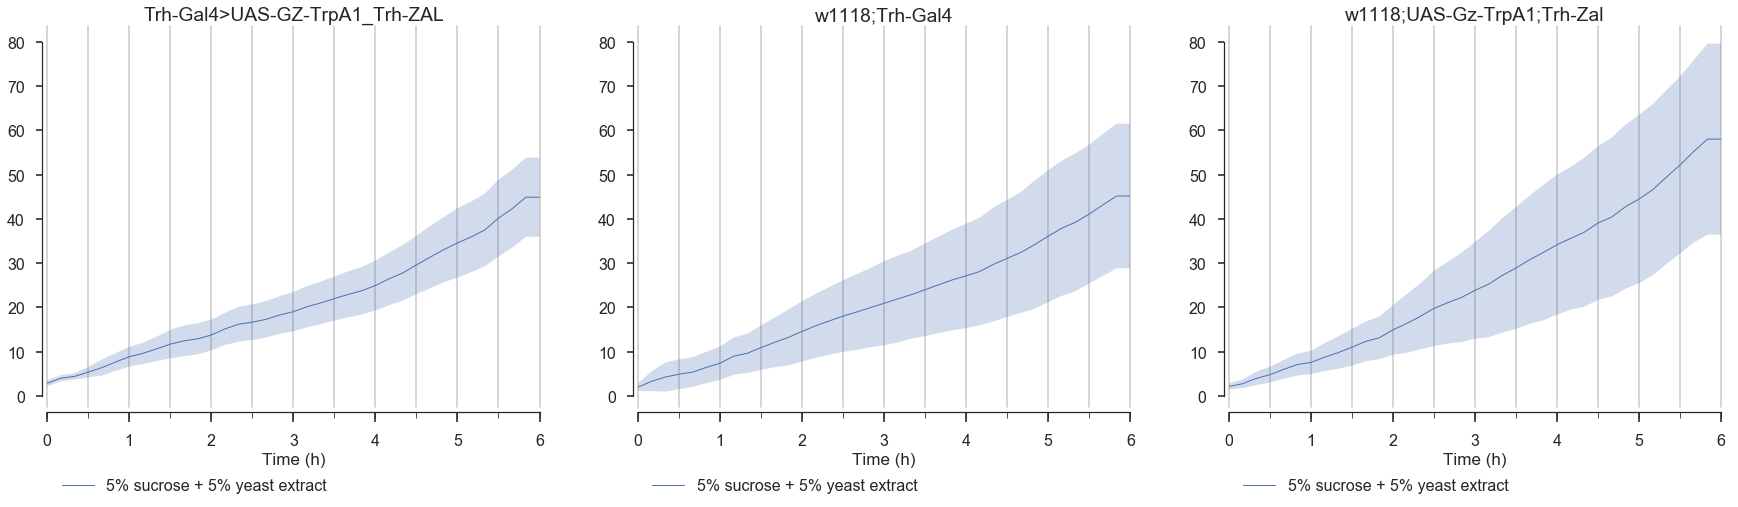

In [5]:
tubes.plot.cumulative.feed_count()

## Used for Development

In [98]:
# df=tubes.feeds.copy()

# group_by='FoodChoice'
# color_by='Genotype'
# resample_by='10min'

# yvar='Cumulative Feed Count'

# df_groupby_resamp_sum=esp._munger.groupby_resamp_sum(df,group_by, color_by, resample_by)
# plotdf=esp._munger.cumsum_for_cumulative(df_groupby_resamp_sum,group_by, color_by)

# plotdf_groupby=plotdf.groupby([color_by,'time_s'])
# plotdf_mean=plotdf_groupby.mean()
# plotdf_halfci=plotdf_groupby.sem()*1.96

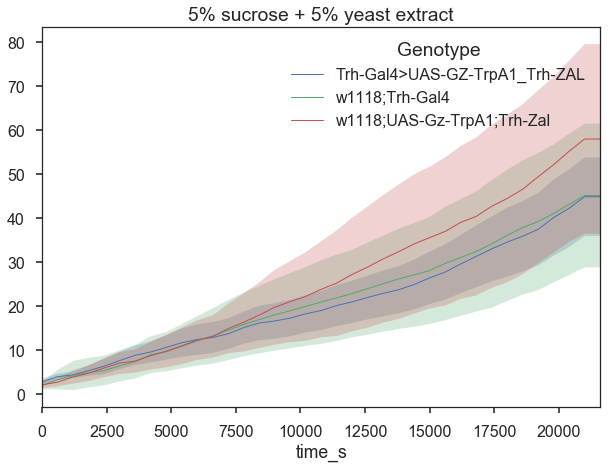

In [99]:
# sns.set(style='ticks',context='poster')
# groupby_grps=np.sort( plotdf[group_by].unique() )
# num_plots=int( len(groupby_grps) )

# x_inches=10*num_plots
# y_inches=7
    
# fig,axx=plt.subplots(nrows=1,
#                       ncols=num_plots,
#                       figsize=(x_inches,y_inches),
#                       gridspec_kw={'wspace':0.2} )

# # Loop through each panel.
# for c, grp in enumerate( groupby_grps ):
#     if len(groupby_grps)>1:
#         plotax=axx[c]
#     else:
#         plotax=axx
        
#     ## Filter plotdf according to group_by.
#     temp_plotdf=plotdf[plotdf[group_by]==grp]

#     ### and make timeseries plot.
#     temp_plotdf_groupby = temp_plotdf.groupby([color_by,'time_s'])
#     temp_plotdf_mean = temp_plotdf_groupby.mean().unstack()[yvar].T
#     temp_plotdf_mean.plot(ax=plotax,lw=1)

#     temp_plotdf_halfci = temp_plotdf_groupby.sem().unstack()[yvar].T*1.96
#     lower_ci = temp_plotdf_mean-temp_plotdf_halfci
#     upper_ci = temp_plotdf_mean+temp_plotdf_halfci
    
#     for c in temp_plotdf_mean.columns:
#         plotax.fill_between(temp_plotdf_mean.index,
#                          lower_ci[c],upper_ci[c],
#                            alpha=0.25)
#     plotax.set_title(grp)